In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Generate Dataset

In [11]:
x1 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x1.shape)
x1[0:10]

(100,)


array([ 0.21369709,  0.48083804,  0.85346335, -0.05082058,  0.02205198,
       -0.88112252,  0.92704347, -0.38063937, -0.70538216,  0.50642248])

In [12]:
x2 = np.random.uniform(low=-1.0, high=1.0, size=100)

print(x2.shape)
x2[0:10]

(100,)


array([-0.99408053,  0.50982313, -0.05546248,  0.9890872 , -0.66855526,
        0.06548993,  0.19452115, -0.07372689,  0.34901857, -0.72497162])

In [13]:
y = 0.3 * x1 + 0.5 * x2 + 0.1
y = (y > 0).astype('int')

print(y.shape)
y[0:10]

(100,)


array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

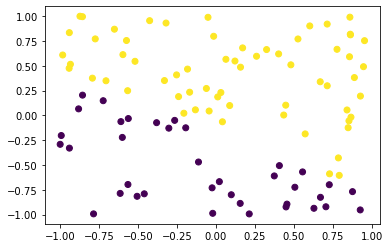

In [14]:
plt.scatter(x1, x2, c=y) #Aim to draw a Decision Boundary with a Single-layer-neural-network

## Define Sigmoid

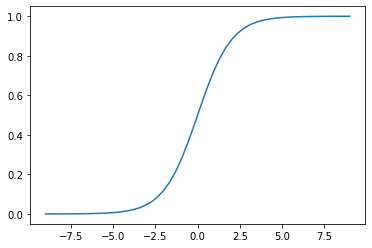

In [15]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9, stop=+9) # uniform values between -9 and 9
yy = sigmoid(xx)

plt.plot(xx, yy)

### Gradient Descent

In [16]:
num_epoch = 100
learning_rate = 1.0

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 + b
    y_predict = sigmoid(y_predict)
    
    ##the reason why 0 or 1 is because % is not the matter anymore
    ##when a single-layer-neural-network has converted to the classification
    predict = (y_predict > 0.5).astype('int')
    error = (predict != y).mean()
    
    if epoch < 0.05:
        break
    
    if epoch % 10 == 0:
        print("{0:2} error = {1:.6f}".format(epoch, error))   
    
    w1 = w1 - learning_rate * ((y_predict - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_predict - y) * x2).mean()
    b = b - learning_rate * (y_predict - y).mean()

print("----" * 10)
print("{0:2} error = {1:.6f}".format(epoch, error))

----------------------------------------
 0 error = 0.240000


In [17]:
import pandas as pd

y_predict = w1 * x1 + w2 * x2 + b
y_predict = sigmoid(y_predict)
y_predict = (y_predict > 0.5).astype('int')

result = pd.DataFrame({'x1': x1, 'x2': x2, 'y(actual)': y, 'y(predict)': y_predict})
result.head(10)

,x1,x2,y(actual),y(predict)
0,0.213697,-0.994081,0,0
1,0.480838,0.509823,1,1
2,0.853463,-0.055462,1,1
3,-0.050821,0.989087,1,1
4,0.022052,-0.668555,0,1
5,-0.881123,0.065490,0,1
6,0.927043,0.194521,1,1
7,-0.380639,-0.073727,0,1
8,-0.705382,0.349019,1,1
9,0.506422,-0.724972,0,1


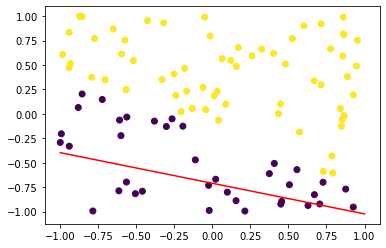

In [18]:
xx = np.linspace(-1.0, +1.0)
yy = -(w1 * xx + b) / w2

plt.scatter(x1, x2, c=y)
plt.plot(xx, yy, c='r')